# 오차역전파법

* 신경망의 가중치 매개변수의 기울기(손실 함수의 기울기)는 수치 미분을 사용해 구했습니다.
* 수치 미분은 단순하고 구현하기도 쉽지만 계산 시간이 오래 걸린다는 큰 단점이 있습니다.
* 5장에서는 가중치 매개변수의 기울기를 효율적으로 계산하는 오차역전파(backpropagation)를 공부하겠습니다.

## 오차역전파법
* 제대로 이해하는 방법은 두 가지 존재 
1. 하나는 수식을 통한 것이고 
2. 다른 하나는 계산 그래프로 이해한다는 것 
    > 이 책은 계산 그래프를 사용해서 시각적으로 설명 

### 계산 그래프
* 계산 그래프는 계산 과정을 그래프로 나타낸 것입니다. 
* 여기에서의 그래프는 우리가 잘 아는 그래프 자료구조로 복수의 노드와 에지로 표현

* 문제 1 : 현빈 군은 슈퍼에서 1개에 100원인 사과를 2개 샀습니다. 이때 지불 금액을 구하세요. 단 소비세가 10% 부과됩니다. 

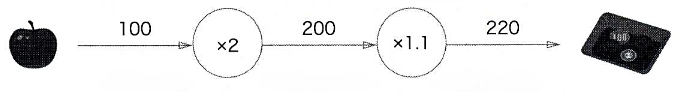

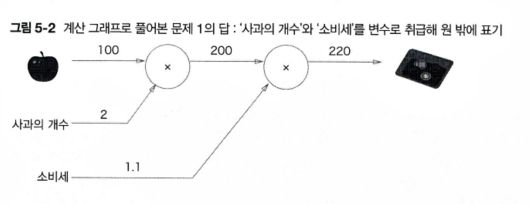

* 문제 2 : 현빈 군은 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개 150원입니다. 소비세가 10%일 때 지불 금액을 구하세요

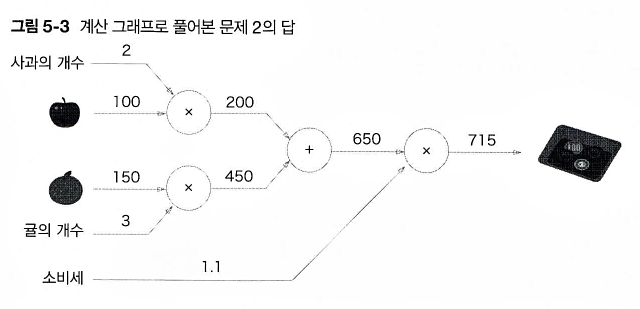

* 그래프를 이용한 문제풀이는 다음 흐름으로 진행
1. 계산 그래프를 구성
2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행

#### 계산을 왼쪽에서 오른쪽으로 진행하는 단계를 순전파(forward propagation)이라고 합니다.
#### 순전파라는 이름이 있다면 반대 방향은 역전파(backpropagation)이라고 합니다.

## 국소적 계산 
* 국소적이란 자신과 직접 관계된 작은 범위라는 뜻
* 국소적 계산은 결국 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 다음 결과를 출력

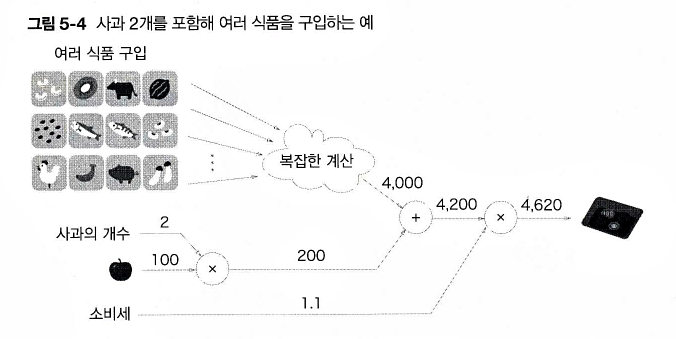

* 위의 그림에서 복잡한 계산에 관계없이 사과는 단지 계산된 4000원하고 더하면 된다 
* 다시 말하면 각 노드는 자신과 관련한 계산이외는 아무것도 신경 쓸 게 없다
* 계산이 아무리 복잡하더라도 각 단계에서 하는 일은 해당 노드에 국한된 국소적 계산입니다.

### 왜 계산 그래프로 푸는가?
* 계산 그래프를 사용하면 방금 설명한 국소적 계산이 가능
* 전체가 아무리 복잡해도 각 노드에서는 단순한 계산에 집중하여 문제를 단순화할 수 있습니다. 
* 계산 그래프는 중간 계산 결과를 모두 보관할 수 있습니다. 

#### 가장 큰 이유는 역전파를 통해 미분을 효율적으로 계산할 수 있다는 점

* 문제 1은 사과를 2개 사서 소비세를 포함한 최종 금액을 구하는 것 
* 여기서 가령 사과 가격이 오르면 최종 금액에 어떤 영향을 미치는지 알고 싶다고 합시다.
* 이는 사과 가격에 대한 지불 금액의 미분을 구하는 문제에 해당 
* 이 미분 값을 사과 값이 아주 조금 올랐을 때 지불 금액이 얼마나 증가하느냐를 표시 

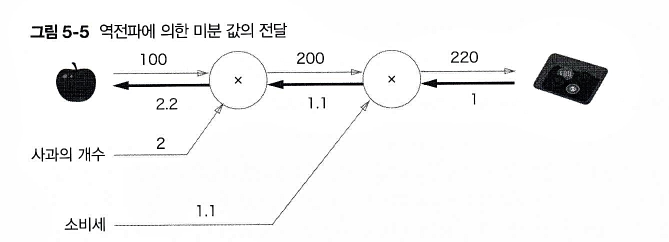

* 역전파는 순전파와는 반대 방향의 화살표로 그립니다. 
* 이 전파는 국소적 미분을 전달하고 그 미분 값은 화살표 아래에 적습니다.
* 이 예에서 역전파는 오른쪽에서 왼쪽으로 1 -> 1.1 -> 2.2순으로 미분 값을 전달합니다.
* 정확히는 사과 값이 아주 조금 오르면 최종 금액은 그 아주 작은 값의 2.2배만큼 오른다는 뜻

## 연쇄법칙
* 역전파는 국소적인 미분을 순방향과는 반대인 오른쪽에서 왼쪽으로 전달 
* 또한 이 국소적 미분을 전달하는 원리는 연쇄법칙(chain rule)에 따른 것입니다. 

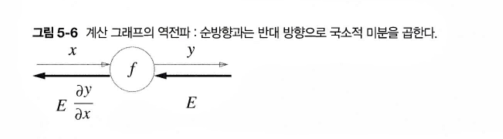

### 합성함수란 여러 함수로 구성된 함수
* z = (x + y)^2

* 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있습니다.
* 이것이 연쇄법칙의 원리 

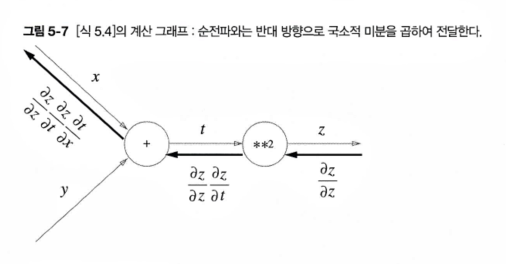

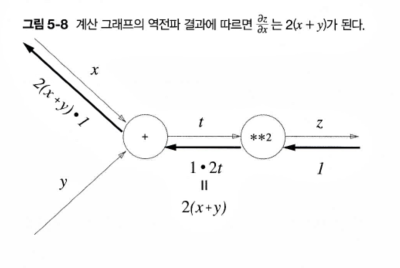

## 역전파
* 이번에는 +와 x 등의 연산을 예로 들어 역전파의 구조를 설명하겠습니다.

* z = x + y의 미분은 다음과 같이 해석적으로 계산할 수 있습니다.

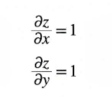

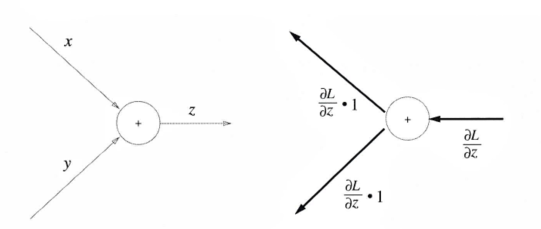

* 역전파 때는 상류에서 전해진 미분에 1을 곱하여 하류로 흘립니다.
* 즉 덧셈 노드의 역전파는 1을 곱하기만 할 뿐이므로 입력된 값을 그대로 다음 노드로 보내게 됩니다. 

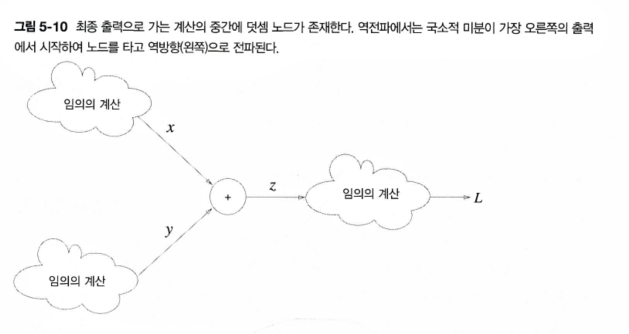

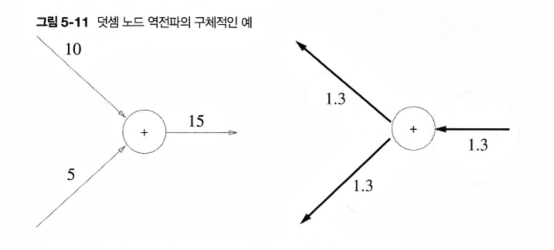

### 곱셈 노드의 역전파

* z = xy라는 식을 생각해보죠

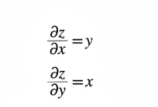

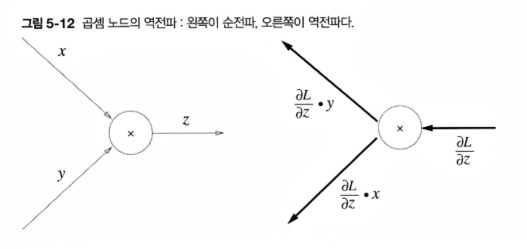

* 곱셈 노드 역전파는 상류의 값에 순전파 때의 입력 신호들을 '서로 바꾼 값'을 곱해서 하류로 보냅니다.
* 서로 바꾼 값이란 위의 그림에서 처럼 순전파 x였다면 역전파는 y, 순전파 때 y였다면 역전파에서는 x로 바꾼다는 의미입니다. 

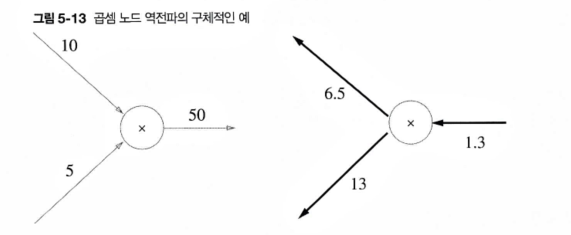

* 곱셈의 역전파는 순방향 입력 신호의 값이 필요합니다. 
* 그래서 곱셈 노드를 구현할 때는 순전파의 입력 신호를 유지합니다.

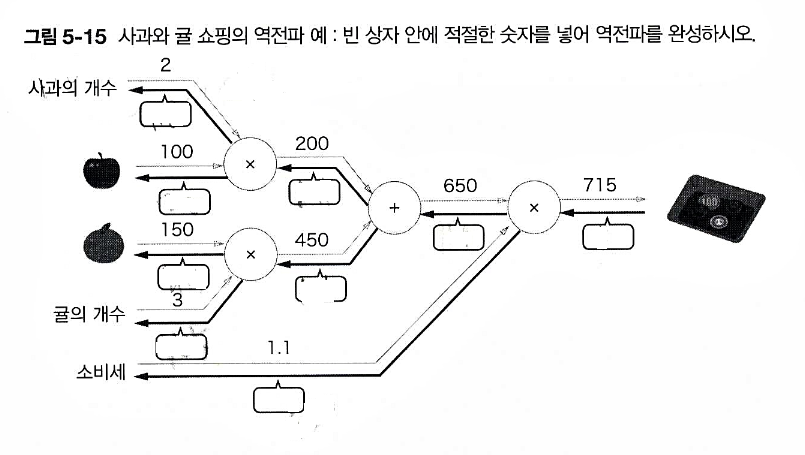

### 자연로그

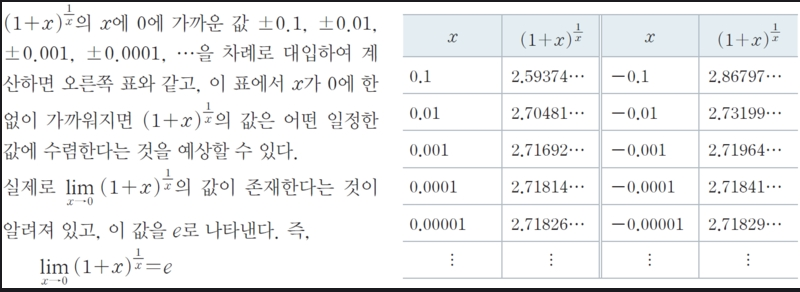

In [1]:
import numpy as np

In [3]:
np.exp(2)

7.38905609893065

In [4]:
2.71829 ** 2

7.389100524100001

## 활성화 함수 계층 구현하기
* 우선은 활성화 함수인 ReLU와 Sigmoid 계층을 구현하겠습니다.

### ReLU 계층

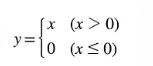

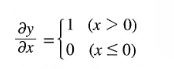

* 순전파 때의 입력인 x가 0보다 크면 역전파는 상류의 값을 그대로 하류로 흘립니다. 
* 반면 순전파 때 x가 0이하면 역전파 때는 하류로 신호를 보내지 않습니다. 

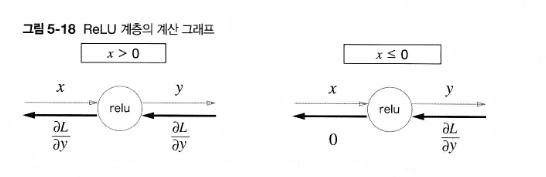

### Sigmoid 계층

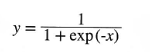

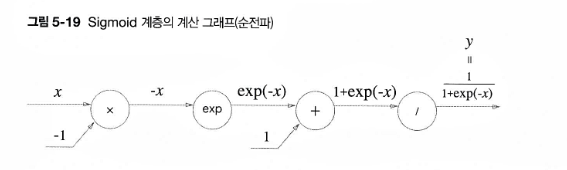

#### 역전파 

* ${y = 1/x}$

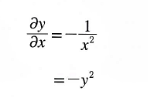

* 역전파 때는 상류의 예측값에 -y^2을 곱해서 하류로 전달합니다.

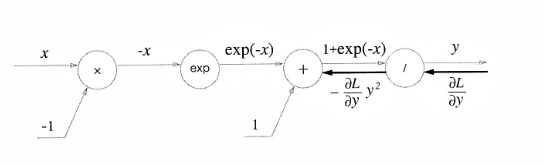

#### 2단계

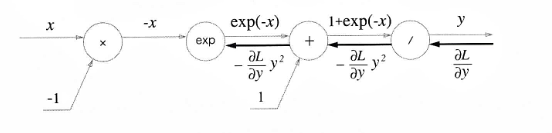

#### 3단계

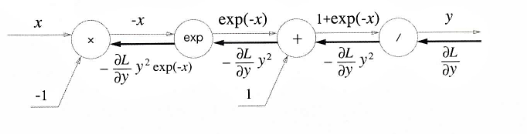

#### 4단계

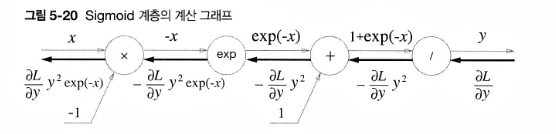

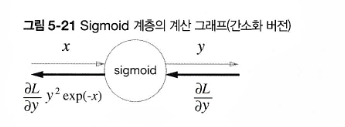

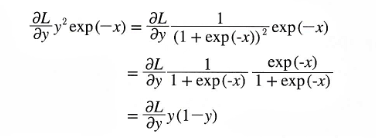

In [6]:
1 / (1 + np.exp(-0.2))

0.549833997312478

## Affine/Softmax 계층 구현하기

### Affine 계층
* 순전파에서는 가중치 신호의 총합을 계산하기 때문에 행렬의 내적(np.dot)을 사용했습니다.

In [1]:
import numpy as np

In [2]:
X = np.random.rand(2)
W = np.random.rand(2,3)
B = np.random.rand(3)

print (X.shape)
print (W.shape)
print (B.shape)

Y = np.dot(X, W) + B

(2,)
(2, 3)
(3,)


In [3]:
Y

array([1.11155079, 1.23178844, 1.81360607])

* 위의 결과를 활성화 함수로 변환해서 다음 층으로 전파하는 것이 신경망 순전파의 흐름이었습니다. 
* 행렬의 내적 계산은 대응하는 차원의 원소 수를 일치시키는게 핵심입니다. 

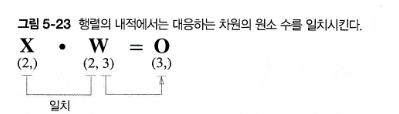

* 행렬의 내적은 기하학에서는 어파인 변환(affine transformation)이라고 합니다. 
* 이 책에서는 어파인 변환을 수행하는 처리를 Affine 계층이라는 이름으로 구현합니다.

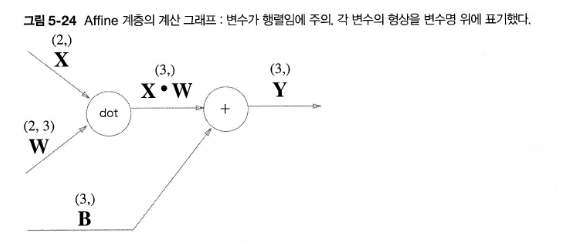

* 행렬을 사용한 역전파도 행렬의 원소마다 전개해보면 스칼라값을 사용한 지금까지의 계산 그래프와 같은 순서로 생각할 수있습니다.
* 실제로 전개해보면 다음 식이 이루어집니다. 

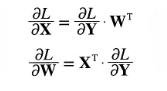

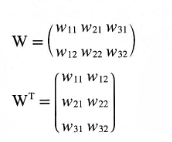

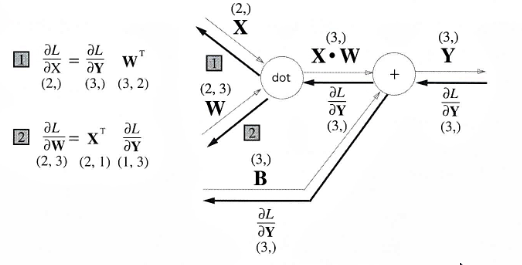

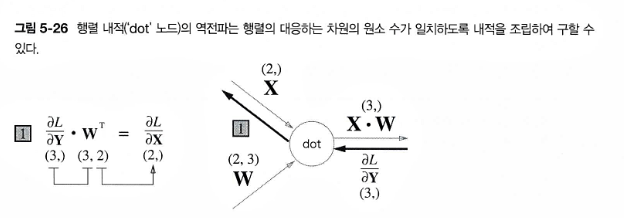

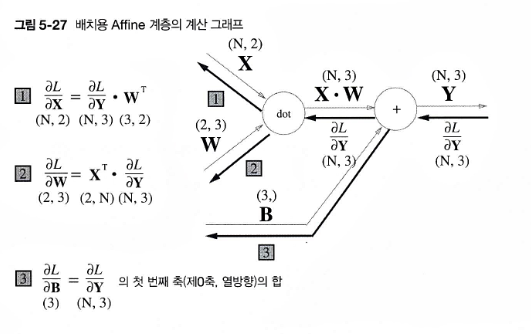

In [9]:
np.array([[2,3,4],[1,2,3]]).shape

(2, 3)

In [10]:
np.array([[2,3,4],[1,2,3]]).T.shape

(3, 2)

## Softmax-with-loss

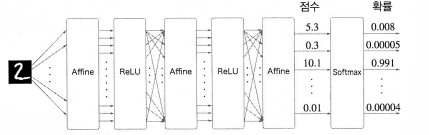

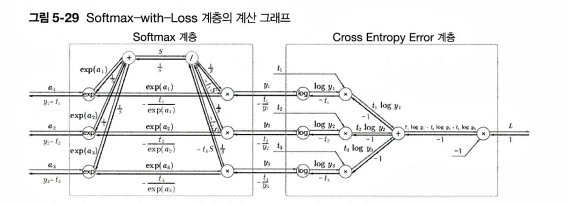

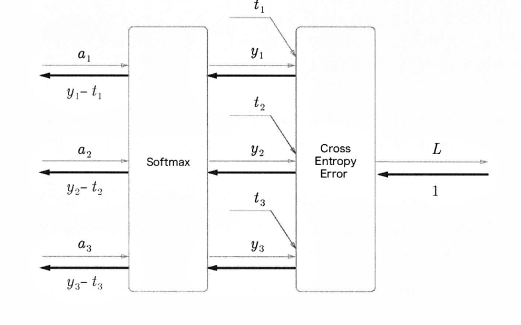